## INA219  
The INA219 is a current shunt and power monitor with an I2C- or SMBUS-compatible interface. The device monitors both shunt voltage drop and bus supply voltage, with programmable conversion times and filtering.  

Manufacturer link: http://www.ti.com/product/INA219  

Breakout board used: https://www.adafruit.com/product/904

In [1]:
import matplotlib.pyplot as plt

from meerkat.ina219 import INA219
from meerkat import base, parser, tools

In [2]:
# bus number 1 on Raspberry Pi
dev = INA219(bus_n=1)

In [3]:
dev.verbose = True

In [4]:
# get configuration register contents
config = dev.get_config()
tools.bprint(config)
base.time.sleep(0.1)

HEX value: 0x399f
0011100110011111
1111110000000000
5432109876543210


Note: bprint outputs bits and two rows of bit index lists
```
0
1   => bit 14 is set to 0
4
```

In [5]:
# reset all configuration settings
dev.reset()

Writing to 'config' registry # 0
Sending HEX value:  0xb99f
Sending Binary value:
HEX value: 0xb99f
1011100110011111
1111110000000000
5432109876543210


For this example, device is connected to a Raspberry Pi 3 5V supply.

In [6]:
dev.get_shunt_voltage()

0.05797

In [7]:
dev.get_bus_voltage()

4.616

In [8]:
dev.get_current_simple()

0.5782999999999999

Calibration Register enables the user to scale the Current Register and Power Register to the most useful value for a given application.  Refer to the datasheet for details

In [9]:
dev.set_calibration(10240)
base.time.sleep(0.1)

Writing to 'calibration' registry # 5
Sending HEX value:  0x2800
Sending Binary value:
HEX value: 0x2800
0010100000000000
1111110000000000
5432109876543210


In [10]:
# confirm calibration value
dev.get_calibration()

10240

In [11]:
dev.get_shunt_voltage()

0.05785

In [12]:
dev.get_bus_voltage()

4.62

In [13]:
# simple return, just float
dev.get_current_simple()

0.5793

In [14]:
# standard method, list with description and sample number
dev.get(description='test_1', n=5)

[['test_1', 1, 4.616, 0.5788],
 ['test_1', 2, 4.604, 0.5786],
 ['test_1', 3, 4.612, 0.5779],
 ['test_1', 4, 4.616, 0.5771999999999999],
 ['test_1', 5, 4.616, 0.578]]

In [15]:
# writing method with description and sample number
dev.write(description='test_2', n=5)

In [16]:
dev.writer.path

'2019_05_31_11_29_24_data.csv'

In [17]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.writer.path)

In [18]:
df.head()

,std_time_ms,description,sample_n,voltage,current,datetime64_ns
0,2019-05-31 11:29:24.106636,test_2,1,4.600,0.5797,2019-05-31 11:29:24.106636
1,2019-05-31 11:29:24.112390,test_2,2,4.588,0.5762,2019-05-31 11:29:24.112390
2,2019-05-31 11:29:24.120359,test_2,3,4.604,0.5765,2019-05-31 11:29:24.120359
3,2019-05-31 11:29:24.132054,test_2,4,4.612,0.5762,2019-05-31 11:29:24.132054
4,2019-05-31 11:29:24.136315,test_2,5,4.612,0.5789,2019-05-31 11:29:24.136315


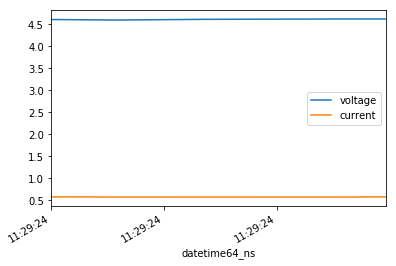

In [19]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack
df[["datetime64_ns", "voltage", "current"]].plot(x="datetime64_ns");

In [20]:
m

{'accuracy': None,
 'bytes': None,
 'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'description': None,
 'device': {'accuracy': None,
  'active': None,
  'bus': '<meerkat.i2c_pi.WrapI2C object at 0x6e96b4d0>',
  'bus_adc_averaging': None,
  'bus_adc_resolution': 12,
  'bus_voltage_range': 32,
  'calibration_date': None,
  'description': 'Texas Instruments Bidirectional Current Monitor',
  'dtype': None,
  'error': None,
  'gain': 8,
  'gain_string': '+/- 320 mV',
  'manufacturer': 'Texas Instruments',
  'mode': 7,
  'mode_description': 'shunt and bus voltages, continuous',
  'name': 'INA219',
  'precision': '12bit',
  'r_shunt': 0.1,
  'shunt_adc_averaging': None,
  'shunt_adc_resolution': 12,
  'state': None,
  'urls': 'www.ti.com/product/ADS1115',
  'version_hw': '1.0',
  'version_sw': '1.0'},
 'double_quote': True,
 'dtypes': None,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': None,
 'hash': None,
 'header': ['description', 'sample_n', 'voltage', 'curr

In [21]:
# reinitialize to JSON output
dev = INA219(bus_n=1, output='json')

In [22]:
# writing method with description and sample number
dev.write(description='test_4', n=5)

In [23]:
with open(dev.writer.path, 'r') as f:
    print(f.readline())

{"current": 0.579, "description": "test_4", "sample_n": 1, "std_time_ms": "2019-05-31 11:29:26.722460", "voltage": 4.6}

